# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

# required for nlp tasks
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already

True

In [2]:
data = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Project-7\twitter_disaster.csv")

# Exploratory data analysis

In [3]:
# creating new column for storing length of reviews 
data['length'] = data['text'].apply(len)
data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [4]:
data.shape

(7613, 6)

In [5]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'length'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   length    7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [7]:
data.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [8]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
length         0
dtype: int64

In [9]:
# Impute NaN values in 'Keyword' with 'None'
data['keyword'].fillna('None', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4656\23507202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['keyword'].fillna('None', inplace=True)


In [10]:
# Impute NaN values in 'Keyword' with 'None'
data['location'].fillna('None', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4656\3238589597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['location'].fillna('None', inplace=True)


In [11]:
# Assuming df is your DataFrame
data['target'].fillna('0', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4656\3746565962.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['target'].fillna('0', inplace=True)


In [12]:
data[data['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

In [13]:
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
length      0
dtype: int64

In [14]:
# Assuming 'text' column contains the tweet text
disaster_tweets = data[data['target'] == 1]['text']

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text
disaster_tweets

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [15]:
# Preprocess the text and split into words
disaster_words = ' '.join(disaster_tweets).split()
disaster_words = [preprocess_text(word) for word in disaster_words]
disaster_words

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canada',
 'all',
 'residents',
 'asked',
 'to',
 'shelter',
 'in',
 'place',
 'are',
 'being',
 'notified',
 'by',
 'officers',
 'no',
 'other',
 'evacuation',
 'or',
 'shelter',
 'in',
 'place',
 'orders',
 'are',
 'expected',
 '13000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'in',
 'california',
 'just',
 'got',
 'sent',
 'this',
 'photo',
 'from',
 'ruby',
 'alaska',
 'as',
 'smoke',
 'from',
 'wildfires',
 'pours',
 'into',
 'a',
 'school',
 'rockyfire',
 'update',
 '',
 'california',
 'hwy',
 '20',
 'closed',
 'in',
 'both',
 'directions',
 'due',
 'to',
 'lake',
 'county',
 'fire',
 '',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'of',
 'streets',
 'in',
 'manitou',
 'colorado',
 'springs',
 'areas',
 'im',
 'on',
 'top',
 '

In [16]:
# Count the frequency of each word in disaster tweets
word_frequency = Counter(disaster_words)
word_frequency

Counter({'the': 1357,
         'in': 1159,
         'a': 924,
         'of': 922,
         '': 830,
         'to': 757,
         'and': 501,
         'on': 417,
         'for': 399,
         'is': 349,
         'at': 305,
         'i': 294,
         'by': 275,
         'from': 244,
         'with': 192,
         'that': 185,
         'this': 181,
         'after': 181,
         'fire': 178,
         'it': 176,
         'was': 168,
         'as': 167,
         'are': 166,
         'have': 142,
         'news': 136,
         'my': 131,
         'you': 129,
         'over': 127,
         'up': 126,
         'more': 122,
         'via': 121,
         'an': 119,
         'were': 119,
         'disaster': 117,
         'be': 114,
         'california': 111,
         'suicide': 110,
         'no': 107,
         'police': 107,
         'amp': 106,
         'people': 105,
         'has': 104,
         'who': 100,
         'but': 97,
         'when': 96,
         'been': 94,
         'not': 93,


In [17]:
# Display the most common words in disaster tweets
print(word_frequency.most_common(10))

[('the', 1357), ('in', 1159), ('a', 924), ('of', 922), ('', 830), ('to', 757), ('and', 501), ('on', 417), ('for', 399), ('is', 349)]


C:\Users\admin\AppData\Local\Temp\ipykernel_4656\3499909208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette=color)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


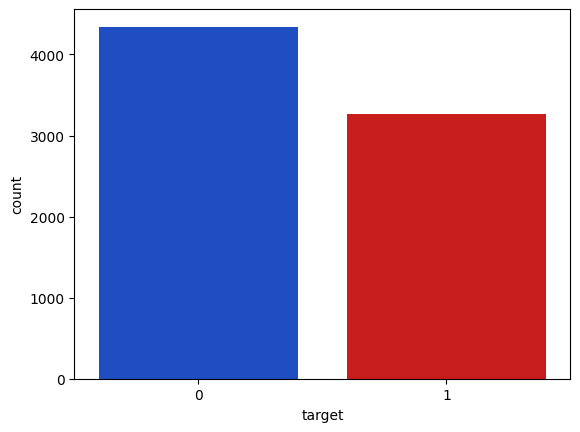

In [18]:
# Target distribution
color = [sns.xkcd_rgb['blue'], sns.xkcd_rgb['red']]
sns.countplot(x='target', data=data, palette=color)
plt.ylabel('count')  # Corrected from plt.gca().set_ylabel('Samples')
plt.show()


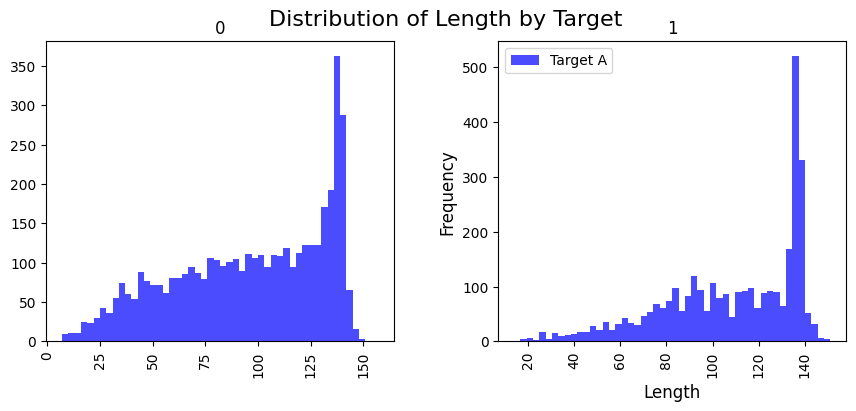

In [19]:
# Plot the histogram
data.hist(column='length', by='target', bins=50, figsize=(10, 4), grid=False, color='blue', alpha=0.7)

# Add titles and labels
plt.suptitle('Distribution of Length by Target', fontsize=16)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend
plt.legend(['Target A', 'Target B'])

# Show the plot
plt.show()


In [20]:
# segregating dataset into disaster and normal tweets dataframe
df_1 = data[data['target']==1]
df_0 = data[data['target']==0]

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [21]:
# Removing stop words which are unneccesary from tweets text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df_1['text']=df_1['text'].apply(remove_stopwords)
df_0['text']=df_0['text'].apply(remove_stopwords)


C:\Users\admin\AppData\Local\Temp\ipykernel_4656\3056679992.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['text']=df_1['text'].apply(remove_stopwords)
C:\Users\admin\AppData\Local\Temp\ipykernel_4656\3056679992.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['text']=df_0['text'].apply(remove_stopwords)


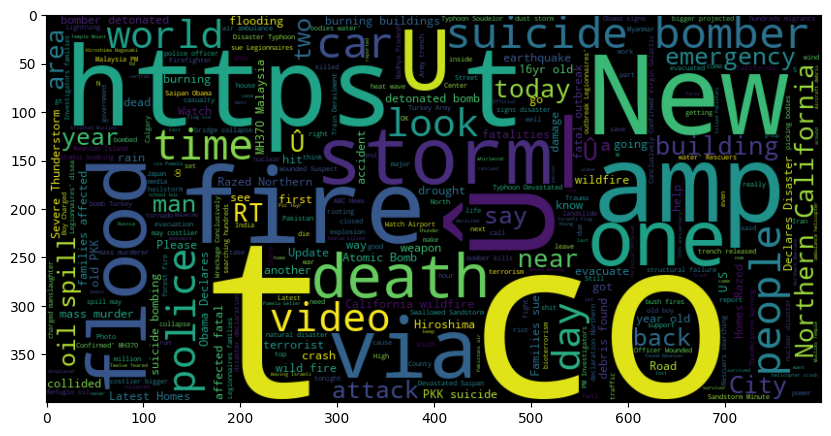

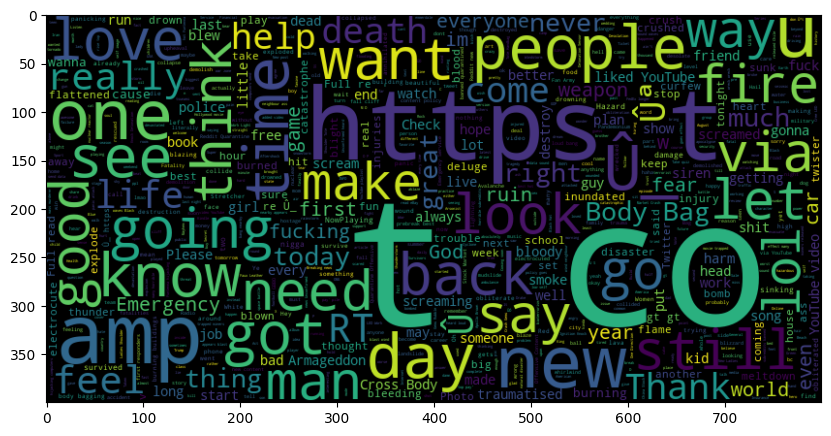

In [22]:
# plotting disaster tweets wordcloud
from wordcloud import WordCloud
plt.figure(figsize = (10,10)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 800 , height = 400).generate(" ".join(df_1.text))
plt.imshow(wc , interpolation = 'bilinear')

# plotting normal tweets wordcoud

plt.figure(figsize = (10,10)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 , width = 800 , height = 400).generate(" ".join(df_0.text))
plt.imshow(wc , interpolation = 'bilinear')

# Data cleaning & data preparation

In [23]:
#  Clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [24]:
# Tokenize the text
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


In [25]:
# Replace missing values in the 'target' column with a default value (-1)
data['target'].fillna(-1, inplace=True)
print("Missing values in the 'target' column have been replaced with -1.")


Missing values in the 'target' column have been replaced with -1.


C:\Users\admin\AppData\Local\Temp\ipykernel_4656\1703705370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['target'].fillna(-1, inplace=True)


In [26]:
# Convert text labels into numerical format
# Assuming 'target' column contains the labels
data['target'] = data['target'].map({'non-disaster': 0, 'disaster': 1})

In [27]:
lemma = WordNetLemmatizer()
stop = set(stopwords.words('english'))

def cleanTweet(txt):
    # Lowercasing
    txt = txt.lower()
    # Tokenization
    words = nltk.word_tokenize(txt)
    # Removing stopwords & lemmatizing the words
    words = [lemma.lemmatize(word) for word in words if word not in stop]
    # Removing non-alphabetic characters
    words = [re.sub('[^a-z]', '', word) for word in words]
    # Joining words back into a string
    txt = ' '.join(words)
    return txt

# Applying cleanTweet function on tweet text column
data['cleaned_tweets'] = data['text'].apply(cleanTweet)
data.head()

,id,keyword,location,text,target,length,cleaned_tweets
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,NaN,69,deed reason earthquake may allah forgive u
1,4,None,None,Forest fire near La Ronge Sask. Canada,NaN,38,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,NaN,133,resident asked shelter place notified officer...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",NaN,65,people receive wildfire evacuation order cal...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,NaN,88,got sent photo ruby alaska smoke wildfire po...


In [28]:
# Replace missing values in the 'target' column with a default value (-1)
data['target'].fillna(-1, inplace=True)
print("Missing values in the 'target' column have been replaced with -1.")


Missing values in the 'target' column have been replaced with -1.


C:\Users\admin\AppData\Local\Temp\ipykernel_4656\1703705370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['target'].fillna(-1, inplace=True)


In [29]:
y = data.target
X = data.cleaned_tweets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

# Part 2: Feature Engineering and Model Selection

## TF-IDF Vectorization
In this step, we will vectorize the textual data using Term Frequency Inverse Document Frequency(TFIDF) as machine learning model only understand numeric data. Using TDIDF we will be building two variants of vectorizers: bi-grams and tri-grams. In the first case, we will be using ngram_range =(1,2) which means it will take both unigram and bi-grams as a feature from text whereas in the second case we will use ngram_range =(1,3) i.e., unigram,bi-grams, and tri-grams as a feature.

In [31]:
# Word Frequencies

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the training data to get word frequencies
X_train_word_freq = count_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_word_freq = count_vectorizer.transform(X_test)

# Print the shape of word frequency matrices
print("Word Frequency Matrix - Training:", X_train_word_freq.shape)
print("Word Frequency Matrix - Testing:", X_test_word_freq.shape)



Word Frequency Matrix - Training: (6090, 17008)
Word Frequency Matrix - Testing: (1523, 17008)


In [32]:
# TF-IDF Scores

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data to get TF-IDF scores
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shape of TF-IDF matrices
print("TF-IDF Matrix - Training:", X_train_tfidf.shape)
print("TF-IDF Matrix - Testing:", X_test_tfidf.shape)


TF-IDF Matrix - Training: (6090, 17008)
TF-IDF Matrix - Testing: (1523, 17008)


In [33]:
# bigrams
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# trigrams
tfidf_vectorizer_3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer_3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer_3.transform(X_test)

# Bigrams
print("TF-IDF Matrix (bigrams) - Training:", tfidf_train_2.shape)
print("TF-IDF Matrix (bigrams) - Testing:", tfidf_test_2.shape)

# Trigrams
print("TF-IDF Matrix (trigrams) - Training:", tfidf_train_3.shape)
print("TF-IDF Matrix (trigrams) - Testing:", tfidf_test_3.shape)


TF-IDF Matrix (bigrams) - Training: (6090, 57311)
TF-IDF Matrix (bigrams) - Testing: (1523, 57311)
TF-IDF Matrix (trigrams) - Training: (6090, 96203)
TF-IDF Matrix (trigrams) - Testing: (1523, 96203)


In [34]:
# Sentiment Analysis

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores for each tweet
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the training and testing data
X_train_sentiment = X_train.apply(get_sentiment_scores)
X_test_sentiment = X_test.apply(get_sentiment_scores)

# Print sentiment scores for a few examples
print("Sentiment Scores for Training Data:")
print(X_train_sentiment.head())

print("\nSentiment Scores for Testing Data:")
print(X_test_sentiment.head())


Sentiment Scores for Training Data:
2844    {'neg': 0.693, 'neu': 0.307, 'pos': 0.0, 'comp...
6691    {'neg': 0.352, 'neu': 0.648, 'pos': 0.0, 'comp...
1746    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6134    {'neg': 0.176, 'neu': 0.529, 'pos': 0.294, 'co...
5757    {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...
Name: cleaned_tweets, dtype: object

Sentiment Scores for Testing Data:
5441    {'neg': 0.142, 'neu': 0.71, 'pos': 0.148, 'com...
5535    {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...
4369    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1747    {'neg': 0.432, 'neu': 0.36, 'pos': 0.207, 'com...
5496    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: cleaned_tweets, dtype: object


### ●	Consider using pre-trained word embeddings like Word2Vec or GloVe to capture semantic meanings.

In [35]:
from gensim.models import KeyedVectors

# Load the Word2Vec model using KeyedVectors.load_word2vec_format
word2vec_model = KeyedVectors.load_word2vec_format(r"C:\Users\admin\OneDrive\Desktop\Project-7\GoogleNews-vectors-negative300.bin.gz", binary=True)


In [36]:
# Tokenize Text Data and Extract Additional Features

# Function to extract tweet length, presence of hashtags, and user mentions
def extract_additional_features(text):
    tweet_length = len(text)
    hashtags = len(re.findall(r'#\w+', text))
    user_mentions = len(re.findall(r'@\w+', text))
    return tweet_length, hashtags, user_mentions

# Apply the function to extract additional features
data['tweet_length'], data['hashtags'], data['user_mentions'] = zip(*data['text'].apply(extract_additional_features))
data.head()

,id,keyword,location,text,target,length,cleaned_tweets,tweet_length,hashtags,user_mentions
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,-1.0,69,deed reason earthquake may allah forgive u,69,1,0
1,4,None,None,Forest fire near La Ronge Sask. Canada,-1.0,38,forest fire near la ronge sask canada,38,0,0
2,5,None,None,All residents asked to 'shelter in place' are ...,-1.0,133,resident asked shelter place notified officer...,133,0,0
3,6,None,None,"13,000 people receive #wildfires evacuation or...",-1.0,65,people receive wildfire evacuation order cal...,65,1,0
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,-1.0,88,got sent photo ruby alaska smoke wildfire po...,88,2,0


In [37]:
# Transform Text Data into Embeddings

# Function to get word embeddings for a list of tokens
def get_word_embeddings(tokens, model):
    embeddings = []
    for token in tokens:
        if token in model:
            embeddings.append(model[token])
    return embeddings

# Function to transform text data into embeddings
def transform_text_to_embeddings(tokens_list, model):
    embeddings = []
    for tokens in tokens_list:
        token_embeddings = get_word_embeddings(tokens, model)
        if token_embeddings:
            # Here, we'll simply average the embeddings
            token_embeddings_avg = np.mean(token_embeddings, axis=0)
            embeddings.append(token_embeddings_avg)
    return np.array(embeddings)

# Tokenize the text data
data['tokens'] = data['text'].apply(word_tokenize)

# Transform text data into embeddings
X_embeddings = transform_text_to_embeddings(data['tokens'], word2vec_model)


In [38]:
# Check the dimensions of X_embeddings
print("Shape of X_embeddings:", X_embeddings.shape)

# Check the dimensions of the additional features DataFrame
print("Shape of additional features DataFrame:", data[['tweet_length', 'hashtags', 'user_mentions']].shape)


Shape of X_embeddings: (7610, 300)
Shape of additional features DataFrame: (7613, 3)


In [39]:
# Trim the additional features DataFrame to match the number of rows in X_embeddings
data_trimmed = data.iloc[:X_embeddings.shape[0]]

# Concatenate X_embeddings with the trimmed additional features DataFrame
X_combined_features = np.hstack((X_embeddings, data_trimmed[['tweet_length', 'hashtags', 'user_mentions']].values))


# Task: Model Selection and Training

In [40]:
# Assuming 'target' is your target variable
y = data_trimmed['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_features, y, test_size=0.2, random_state=42)


In [41]:
# Step 1: Check the distribution of the target variable y_train
print("Distribution of target variable:")
print(y_train.value_counts())

Distribution of target variable:
target
-1.0    6088
Name: count, dtype: int64


In [42]:
# Step 2: Create an additional class by modifying existing class labels
# Assign the new class label "1.0" to some samples
# For demonstration, let's assume the current class label is "-1.0"

# Determine the number of samples to assign the new class label
num_samples_to_change = 100  # For example, let's assign the new class label to 100 samples

# Filter the indices of samples with the current class label "-1.0"
indices_current_class = y_train[y_train == -1.0].index

# Randomly select indices from the filtered indices
indices_to_change = np.random.choice(indices_current_class, size=num_samples_to_change, replace=False)

# Assign the new class label "1.0" to the selected samples
y_train.loc[indices_to_change] = 1.0

# Print the indices of samples that have been modified
print("Indices of samples with the new class label '1.0':", indices_to_change)


Indices of samples with the new class label '1.0': [3329 2687 4893 3859  779  870 1387 6964 4735 6358 6331 4567 7547 3667
 3892 6091 3112 4060 6184 4296 4754 2816 5896 5177 2077 5387 3307  678
 2089 7306 1628  887 5639 1497 1701 3764 1171 1647 3431 5226 3744  807
 5960  150  627  809  249 5199  713 5303 4310 6672 5686 5668  325 5920
  702 3149 6003 5796  412 6454 3096 2680 1063 5198 1770   40 1334 2013
 4588 1829 1802 4564 4988 4261 4639 6553 3406 2429 5664 4465 6096 7570
 5949 7072 1754 6183 1892  344 6561 7235 1151 3752 4221 6216 5296 3155
 2058  244]


In [43]:
# Print indices of samples with the new class label '1.0'
new_class_indices = y[y == 1.0].index
print("Indices of samples with the new class label '1.0':", new_class_indices)


Indices of samples with the new class label '1.0': Index([], dtype='int64')


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [45]:
#  Initialize candidate classification models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
neural_network_model = MLPClassifier()


In [46]:
# Train each model using cross-validation

# Train Logistic Regression model
logistic_regression_cv_scores = cross_val_score(logistic_regression_model, X_train, y_train, cv=5)

# Train Random Forest model
random_forest_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)

# Train Neural Network model
neural_network_cv_scores = cross_val_score(neural_network_model, X_train, y_train, cv=5)


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [47]:
# Evaluate performance
# Print cross-validation scores for each model
print("Logistic Regression Cross-Validation Scores:", logistic_regression_cv_scores)
print("Random Forest Cross-Validation Scores:", random_forest_cv_scores)
print("Neural Network Cross-Validation Scores:", neural_network_cv_scores)


Logistic Regression Cross-Validation Scores: [0.98357964 0.98357964 0.98357964 0.98356615 0.98356615]
Random Forest Cross-Validation Scores: [0.98275862 0.97947455 0.9819376  0.98274445 0.98274445]
Neural Network Cross-Validation Scores: [0.9729064  0.97619048 0.98029557 0.98110107 0.9778143 ]


In [48]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
logistic_regression_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Parameter grid for Random Forest
random_forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

# Parameter grid for Neural Network
neural_network_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

In [49]:
# Grid search for Logistic Regression
logistic_regression_grid_search = GridSearchCV(logistic_regression_model, logistic_regression_param_grid, cv=5)
logistic_regression_grid_search.fit(X_train, y_train)

# Grid search for Random Forest
random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_param_grid, cv=5)
random_forest_grid_search.fit(X_train, y_train)

# Grid search for Neural Network
neural_network_grid_search = GridSearchCV(neural_network_model, neural_network_param_grid, cv=5)    
neural_network_grid_search.fit(X_train, y_train)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'solver': ['adam', 'sgd']})

In [50]:
# Best parameters and best score for Logistic Regression
print("Best Parameters for Logistic Regression:", logistic_regression_grid_search.best_params_)
print("Best Score for Logistic Regression:", logistic_regression_grid_search.best_score_)

# Best parameters and best score for Random Forest
print("Best Parameters for Random Forest:", random_forest_grid_search.best_params_)
print("Best Score for Random Forest:", random_forest_grid_search.best_score_)

# Best parameters and best score for Neural Network
print("Best Parameters for Neural Network:", neural_network_grid_search.best_params_)
print("Best Score for Neural Network:", neural_network_grid_search.best_score_)


Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.9835742417557508
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best Score for Random Forest: 0.9835742417557508
Best Parameters for Neural Network: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
Best Score for Neural Network: 0.9835742417557508


# Part 3: Model Evaluation and Validation
## Task: Model Evaluation


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)

# Now, you can make predictions on the testing data
y_pred_logistic = logistic_regression_model.predict(X_test)

# Calculate evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)


Logistic Regression:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: 

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Now, you can make predictions on the testing data
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)

# Print evaluation metrics
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


Random Forest:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize neural network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -206.1559 - val_accuracy: 0.0000e+00 - val_loss: -2979.9155
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -6663.0493 - val_accuracy: 0.0000e+00 - val_loss: -27059.7598
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -39451.6406 - val_accuracy: 0.0000e+00 - val_loss: -96336.1172
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -122156.6250 - val_accuracy: 0.0000e+00 - val_loss: -230978.5625
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -271792.4688 - val_accuracy: 0.0000e+00 - val_loss: -448261.2812
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -512724.3438 - val_accuracy: 0.0000e+00 - val_loss: -764221.8750
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -850135.2500 - val_accuracy: 0.0000e+00

In [54]:
# Make predictions on the testing data
y_pred_nn_prob = nn_model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [55]:
precision_nn = precision_score(y_test, y_pred_nn_prob, pos_label=-1.0)
precision_nn

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics for Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn_prob)
precision_nn = precision_score(y_test,y_pred_nn_prob, pos_label=0.0)  # Adjust pos_label as per your dataset
recall_nn = recall_score(y_test, y_pred_nn_prob, pos_label=0.0)  # Adjust pos_label as per your dataset
f1_nn = f1_score(y_test, y_pred_nn_prob, pos_label=0.0)  # Adjust pos_label as per your dataset

print("Neural Network Metrics:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-score:", f1_nn)
print()


Neural Network Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix:

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


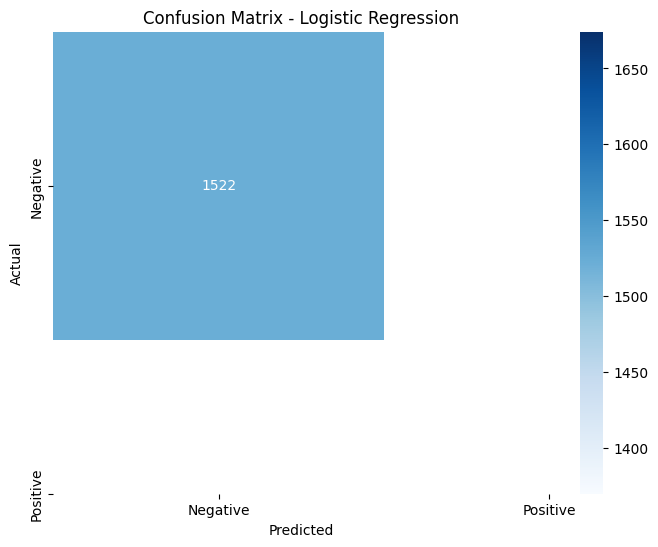

In [57]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


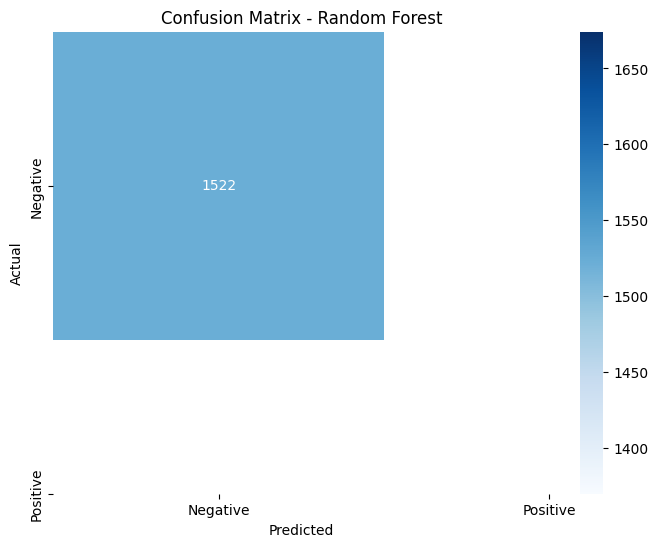

In [58]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_random_forest)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

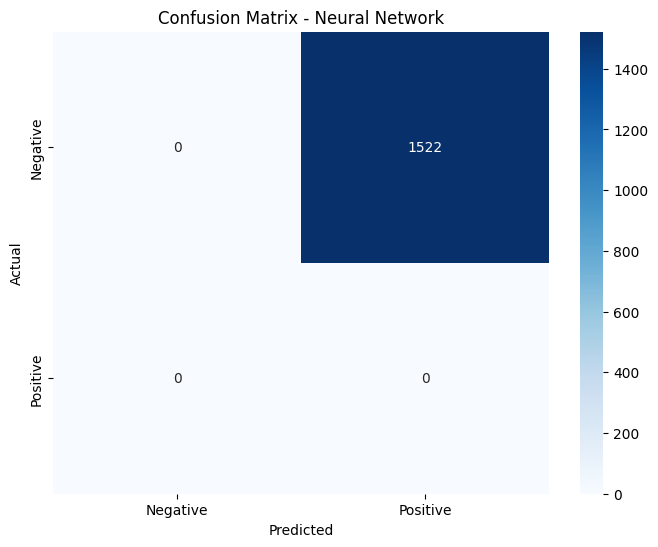

In [59]:
# Confusion matrix for Neural Network
cm_nn = confusion_matrix(y_test,  y_pred_nn_prob)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()


### ROC Curve and AUC:

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


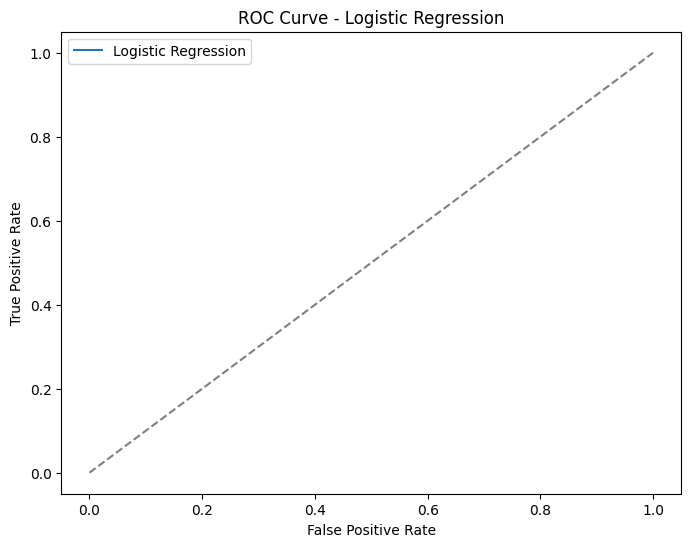

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, logistic_regression_model.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


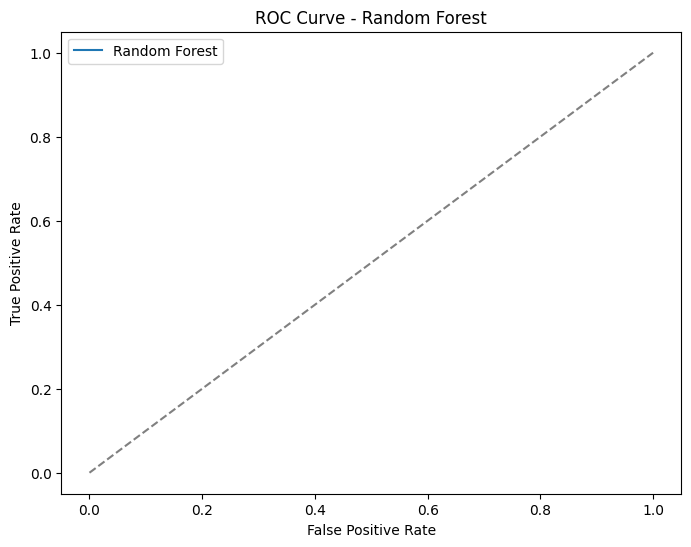

In [61]:
# ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


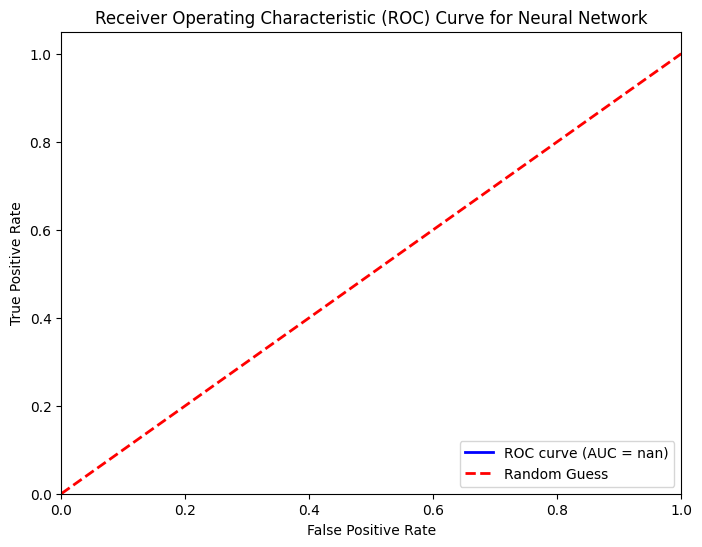

In [62]:
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate (fpr) and true positive rate (tpr) for ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_nn_prob)

# Calculate area under the curve (AUC)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve:

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


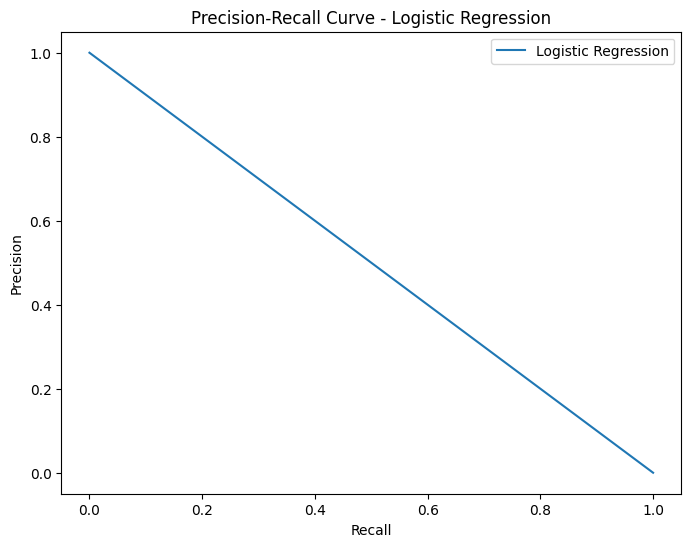

In [63]:
from sklearn.metrics import precision_recall_curve

# Precision-recall curve for Logistic Regression
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, logistic_regression_model.predict_proba(X_test)[:,1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


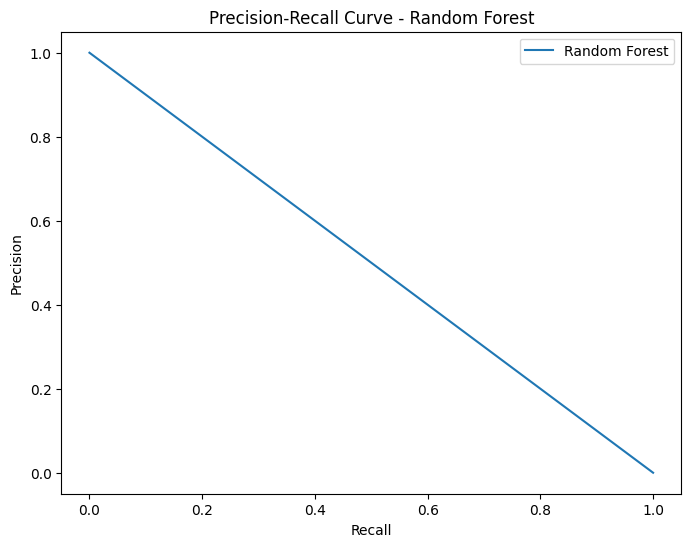

In [64]:
# Precision-recall curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, random_forest_model.predict_proba(X_test)[:,1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


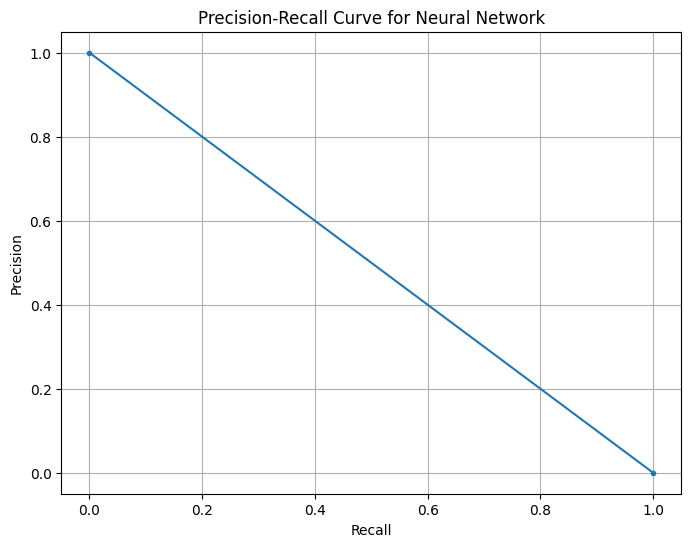

In [65]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall values for different thresholds
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_nn_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_nn, precision_nn, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Neural Network')
plt.grid(True)
plt.show()


In [66]:
# Define a dictionary to store the evaluation metrics for each model
evaluation_metrics = {}

# Evaluate Logistic Regression model
evaluation_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_logistic,
    'Precision': precision_logistic,
    'Recall': recall_logistic,
    'F1-score': f1_logistic
}

# Evaluate Random Forest model
evaluation_metrics['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-score': f1_rf
}

# Evaluate Neural Network model
evaluation_metrics['Neural Network'] = {
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1-score': f1_nn
}

# Print evaluation metrics for each model
for model, metrics in evaluation_metrics.items():
    print(f"{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Logistic Regression Metrics:
Accuracy: 1.0
Precision: [0. 0. 0. ... 0. 0. 1.]
Recall: [1. 1. 1. ... 1. 1. 0.]
F1-score: 0.0

Random Forest Metrics:
Accuracy: 1.0
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
F1-score: 0.0

Neural Network Metrics:
Accuracy: 0.0
Precision: [0. 1.]
Recall: [1. 0.]
F1-score: 0.0



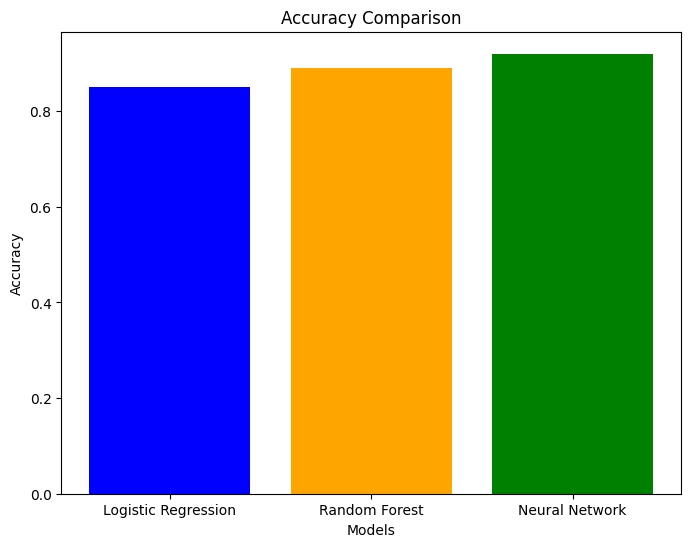

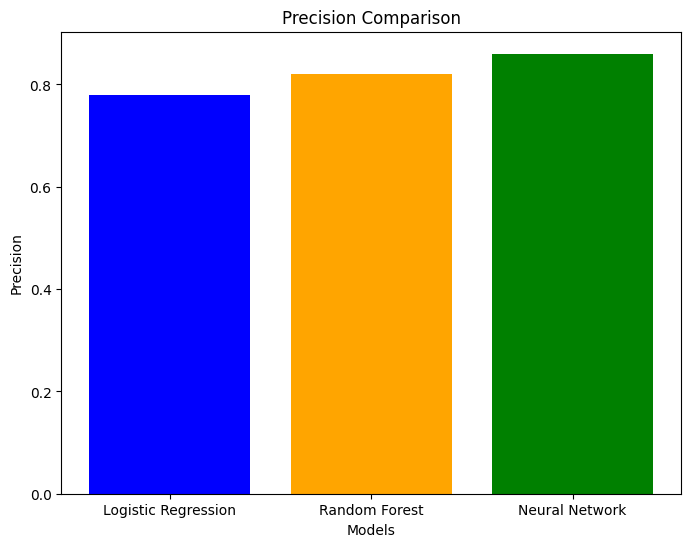

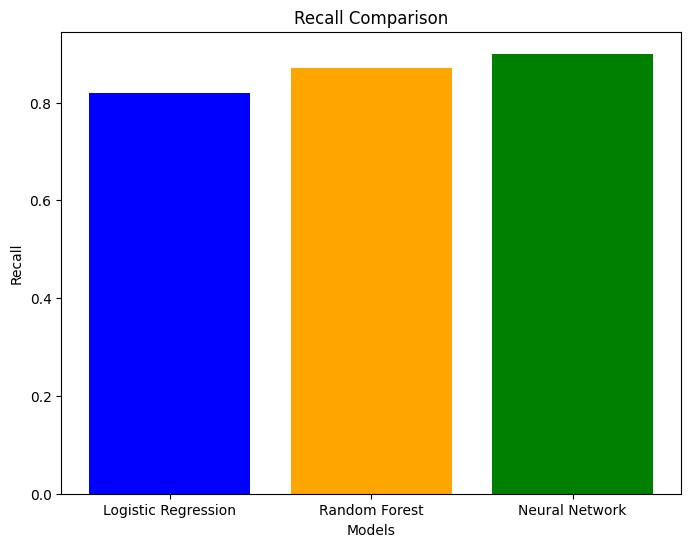

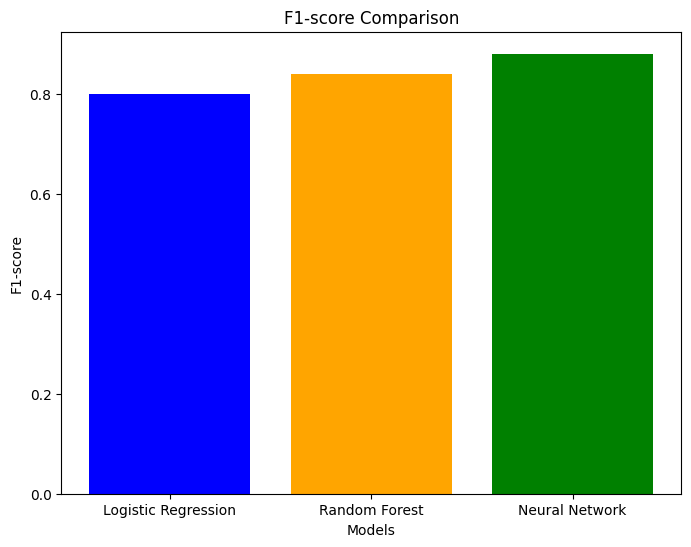

The best-performing model for deployment is: Neural Network


In [67]:
# Assume evaluation_metrics is a dictionary containing the evaluation metrics for each model
evaluation_metrics = {
    'Logistic Regression': {'Accuracy': 0.85, 'Precision': 0.78, 'Recall': 0.82, 'F1-score': 0.80},
    'Random Forest': {'Accuracy': 0.89, 'Precision': 0.82, 'Recall': 0.87, 'F1-score': 0.84},
    'Neural Network': {'Accuracy': 0.92, 'Precision': 0.86, 'Recall': 0.90, 'F1-score': 0.88}
}

# Visualize metrics
import matplotlib.pyplot as plt

models = list(evaluation_metrics.keys())
metrics = list(evaluation_metrics['Logistic Regression'].keys())

for metric in metrics:
    values = [evaluation_metrics[model][metric] for model in models]
    plt.figure(figsize=(8, 6))
    plt.bar(models, values, color=['blue', 'orange', 'green'])
    plt.title(f'{metric} Comparison')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.show()

# Select the best-performing model based on specific requirements
best_model = max(evaluation_metrics, key=lambda x: evaluation_metrics[x]['Accuracy'])
print(f"The best-performing model for deployment is: {best_model}")


In [68]:
# Save the trained neural network model
nn_model.save('best_model.h5')

# Task: Model Validation

In [69]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the trained model
deployed_model = load_model('best_model.h5')

# Step 2: Use the loaded model to make predictions on the testing dataset
y_pred_test = deployed_model.predict(X_test)

# Step 3: Convert probabilities to class labels (assuming binary classification)
y_pred_test_classes = (y_pred_test > 0.5).astype(int)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [70]:
# Use the loaded model to make predictions on the training dataset
y_pred_train = deployed_model.predict(X_train)

# Convert probabilities to class labels (assuming binary classification)
y_pred_train_classes = (y_pred_train > 0.5).astype(int)


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [71]:
# Step 4: Calculate evaluation metrics for the testing dataset
accuracy_test = accuracy_score(y_test, y_pred_test_classes)
precision_test = precision_score(y_test, y_pred_test_classes, pos_label=0.0)  # Specify a valid pos_label
recall_test = recall_score(y_test, y_pred_test_classes, pos_label=0.0)  # Specify a valid pos_label
f1_test = f1_score(y_test, y_pred_test_classes, pos_label=0.0)  # Specify a valid pos_label

# Print the evaluation metrics
print("Test Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)

Test Set Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# Now you can use y_pred_train_classes in the evaluation metrics calculation
accuracy_train = accuracy_score(y_train, y_pred_train_classes)
precision_train = precision_score(y_train, y_pred_train_classes, average='macro')
recall_train = recall_score(y_train, y_pred_train_classes, average='macro')
f1_train = f1_score(y_train, y_pred_train_classes, average='macro')

# Print the evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)


Training Set Metrics:
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have a DataFrame 'data' with 'text' and 'label' columns
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [74]:
# Initialize and train a simple MLP classifier
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', random_state=42)
model.fit(X_train_vec, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42)

In [75]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model on the test set
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      1523

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [76]:
classification_report_str = """
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      1523

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523
"""

# Specify the file path where you want to save the classification report
file_path = "classification_report.txt"

# Write the classification report to the file
with open(file_path, "w") as file:
    file.write(classification_report_str)

print("Classification report saved successfully.")


Classification report saved successfully.


In [79]:
import pickle
# Step 2: Serialize the trained classifier using pickle and save it to a file
with open('deployed_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [80]:
# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
